**Roadmap:**

1. Tell how we are trying to find a prediction better than a random walk 

2. Explain economic theory using mean reverting and RER = PPP * Nom

3. Explain methodology of shorting and why when I get negative/positive numbers you short vs long
    diagram on shorting and synthetic loans cuz its confusing af
    explain the assumptions I am using

4. Set up mean reverting, show scatter of an example country with a line at the mean and explain why in the long run 
    Show how its bad and predicts really wrong, explain how if we had very far back data this could work out

5. Set up the PPP RER model and its issues
6. Show when you just $1000 lump sum invest in anything deviating from 0 
7. show how you get a much better prediction when invest proprtionatly the changes (talk about why I clipped it)

8. make maps showing for an example year what countries we are shorting or holding with 




In [23]:
import pandas as pd 
import numpy as np

def data_comp(variables):

    '''
    cleaning OECD data pass in the name of csv files you are using

    '''
    for n, var in enumerate(variables):

        #read in file OECD data

        df =  pd.read_csv(f"{var}.csv")

        #drop redundent columns and transform it into Year, Country, Variable

        df.columns = df.iloc[2]
        df.drop([0,1,2], inplace=True)
        df.drop(df.columns[1:44], axis=1, inplace=True)
        df.set_index('Country Name', inplace = True, drop = True)
        df = df.T
        df.index = [round(idx) for idx in df.index]
        df.index = pd.to_datetime(df.index, format='%Y')
        df = df.reset_index()
        df = pd.melt(df, id_vars=['index'], value_vars=df.columns[1:], var_name='Country Name', value_name='Value')

        df.set_index(['index', 'Country Name'], inplace=True)
        df.index.names = ["Year", "Country Name"]
        df.rename(columns={'Value': var}, inplace=True)

        #making the dataframe and combining over all variables
        if n == 0: 
            full_df = df
        else: 
            full_df = pd.concat([full_df, df], axis =1)
    return(full_df)

df_ML = data_comp(['GDP', 'Govt_debt_gdp', 'GDP growth rate','GNI per capita',
            'Inflation', 'Lending rate', 'Net exports', 'Total_reserve', 'Forex rate'])

#writting to a csv
#full_df.to_csv('EX_rate_table.csv', index=True)



In [24]:
df_PPP_model= data_comp(['RER', 'Forex rate', 'PPP'])
df_PPP = pd.read_csv(f"PPP_US.csv")

df_PPP_model = df_PPP_model[df_PPP_model.notna().all(axis=1)]
print(df_PPP_model)

#making the contructed RER which I am defining from 456 notes as RER =  (forgien exchnage rate * P_in country)/ P_in US
#here P_in country/P in US == PPP

df_PPP_model['con_RER'] = (df_PPP_model['Forex rate'] * df_PPP_model['PPP'])

#Now we have to see how this constructed RER compares with the reported RER and NomER (Forex rate)
#theretically in the long run these would be zero since the NOM*PPP == RER_normed
#Then I divided by 100 to get the percetage if it is negative that implies currency will appriciate
#if is positive it will depreiciate

#Clearly a lot of issues and gross assumptions
# 1. this only holds for inflation bearing countries  which might be why issues arise in non advanced countries
# 2. not clear if mean reverting in long long 
# 3. not clear if assumptions on PPP hold in long run
# 4. clealy issues in this not taking into consideration risks i.e. a forgein exchange might appear undervalued but that is because its risky
# 5. very US centric by norming to the US each period as the US curency itself might have issues

df =df_PPP_model.reset_index()
#df_PPP_model.to_csv('testing1.csv', index=True)


                               RER  Forex rate       PPP
Year       Country Name                                 
2000-01-01 Armenia       74.010935  539.525833  0.234525
2001-01-01 Armenia       73.034791  555.078258  0.231919
2002-01-01 Armenia       73.665189  573.353333  0.226287
2003-01-01 Armenia       67.937520  578.762954  0.229938
2004-01-01 Armenia       71.634581  533.450833  0.258205
...                            ...         ...       ...
2017-01-01 Zambia        94.221086    9.517500  0.440513
2018-01-01 Zambia        88.528850   10.458333  0.420550
2019-01-01 Zambia        79.795053   12.890000  0.360806
2020-01-01 Zambia        66.438740   18.344093  0.284940
2021-01-01 Zambia        69.764269   20.018487  0.319845

[1766 rows x 3 columns]


In [25]:
df= pd.read_csv(f"PPP_US.csv")

country_mapping = {

    'ARM': 'Armenia', 'ATG': 'Antigua and Barbuda', 'AUS': 'Australia', 'BDI': 'Burundi', 'BGR': 'Bulgaria', 
    'BHR': 'Bahrain', 'BHS': 'Bahamas, The', 'BLZ': 'Belize', 'BOL': 'Bolivia', 'BRA': 'Brazil', 
    'CAF': 'Central African Republic', 'CAN': 'Canada', 'CHE': 'Switzerland', 'CHL': 'Chile', 'CHN': 'China', 
    'CIV': "Cote d'Ivoire", 'CMR': 'Cameroon', 'COD': 'Congo, Dem. Rep.', 'COL': 'Colombia', 'CRI': 'Costa Rica', 
    'CYP': 'Cyprus', 'CZE': 'Czechia', 'DMA': 'Dominica', 'DNK': 'Denmark', 'DOM': 'Dominican Republic', 
    'DZA': 'Algeria', 'FJI': 'Fiji', 'GAB': 'Gabon', 'GBR': 'United Kingdom', 'GEO': 'Georgia', 'GHA': 'Ghana', 
    'GMB': 'Gambia, The', 'GNQ': 'Equatorial Guinea', 'GRC': 'Greece', 'GRD': 'Grenada', 'GUY': 'Guyana', 
    'HKG': 'Hong Kong SAR, China', 'HRV': 'Croatia', 'HUN': 'Hungary', 'IRN': 'Iran, Islamic Rep.', 'ISL': 'Iceland', 
    'ISR': 'Israel', 'JPN': 'Japan', 'KNA': 'St. Kitts and Nevis', 'KOR': 'Korea, Rep.', 'LCA': 'St. Lucia', 
    'LSO': 'Lesotho', 'LVA': 'Latvia', 'MAR': 'Morocco', 'MDA': 'Moldova', 'MEX': 'Mexico', 'MKD': 'North Macedonia', 
    'MLT': 'Malta', 'MWI': 'Malawi', 'MYS': 'Malaysia', 'NGA': 'Nigeria', 'NIC': 'Nicaragua', 'NOR': 'Norway', 
    'NZL': 'New Zealand', 'PAK': 'Pakistan', 'PHL': 'Philippines', 'PNG': 'Papua New Guinea', 'POL': 'Poland', 
    'PRY': 'Paraguay', 'ROU': 'Romania', 'RUS': 'Russian Federation', 'SAU': 'Saudi Arabia', 'SGP': 'Singapore', 
    'SLB': 'Solomon Islands', 'SLE': 'Sierra Leone', 'SVK': 'Slovak Republic', 'SWE': 'Sweden', 'TGO': 'Togo', 
    'TTO': 'Trinidad and Tobago', 'TUN': 'Tunisia', 'UGA': 'Uganda', 'UKR': 'Ukraine', 'URY': 'Uruguay', 'USA': 'United States',
    'VCT': 'St. Vincent and the Grenadines', 'VEN': 'Venezuela, RB', 'WSM': 'Samoa', 'ZAF': 'South Africa',
    'ZMB': 'Zambia'}

def apply_country_mapping(location):
    if location in country_mapping:
        return country_mapping[location]
    else:
        return None

df['LOCATION'] = df['LOCATION'].apply(apply_country_mapping)

# Extract only the necessary columns
df = df[['LOCATION', 'TIME', 'Value']]
df['TIME'] = pd.to_datetime(df['TIME'], format='%Y')

df = df.rename(columns={'Value': 'PPP_for_ER'})
df = df.dropna()
df.set_index(['TIME', 'LOCATION'], inplace=True)
df.index.set_names(['Year', 'Country Name'], inplace=True)
df



,,PPP_for_ER
Year,Country Name,
1960-01-01,Australia,0.700946
1961-01-01,Australia,0.701324
1962-01-01,Australia,0.687990
1963-01-01,Australia,0.698321
1964-01-01,Australia,0.708346
...,...,...
2017-01-01,Cameroon,232.801392
2018-01-01,Cameroon,231.682690
2019-01-01,Cameroon,230.273904


float64


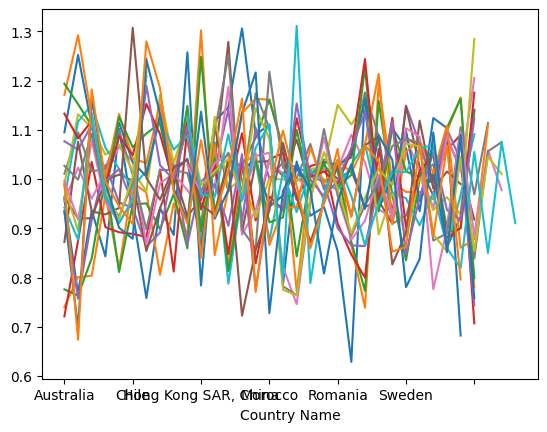

In [44]:
df
df_merged = df.merge(df_PPP_model, left_index=True, right_index=True, how='inner')

#theretically in the long run these would be zero since the NOM*PPP == RER_normed
#so now we will calculate the difference between the constructed Real exchange rate where RER = PPP*NER
#versus the calculated PPP

#if the PPP*nom is higher than the PPP based on the exchange rate the currency would be overvalued
#id PPP *nom is lower than PPP the currency would be undervalued

#a lot of issues because I dont know the methodology of how the real excahnge rate of PPP was calculated for the country which I grabbed
#from OCED but still shows what we want to buy or sell depending on the year

df_merged['Final_diff'] = df_merged['con_RER'] - df_merged['PPP_for_ER']
#filtering out unstable ones
df_merged = df_merged[df_merged['Final_diff']>-0.1]
df_merged = df_merged[df_merged['Final_diff']<0.1]

print(df_merged['Final_diff'].dtype)
df_merged.sort_index(inplace=True)

# Select all rows with years before 2015 and including 2015
df_year_before_2015 = df_merged.loc[(slice(None, '2015-01-01'), slice(None)), :]




df_merged['diff_in_ave_RER'] = df_merged['RER'].div(df_year_before_2015.groupby('Country Name').mean()['RER'])

df_years={}
for yr in range(2000, 2022):
    name = f'df_{yr}'
    dt_year= pd.to_datetime(f'{yr}-01-01')
    df_year = df_merged.loc[(dt_year, slice(None))]
    df_years[yr] = df_year
    df_years[yr]['diff_in_ave_RER'].plot()



In [55]:
#Now how to short, if >0 then bet against country 
#if <0 then bet with the country so take out a loan in the US and buy other currency with that loan then repay in 5 yrs see if profit 
#abstracting away from interest rate differentials in different countries and the mess that holding money in one currency over another brings)
#assumption that you will be able to hold this real value constant 

#CHAT GPT 
#In theory, it is possible to take out a loan in a currency that you believe will devalue, convert it to a more stable currency such as USD, 
#and then use the proceeds to repurchase the original currency at a lower value after
# the devaluation has occurred, potentially resulting in a profit. This type of strategy is known as currency speculation or currency trading

#So the neg or pos will signal if bet against or for and then after five years simulate what will happen when repay everything 

Mean Reverting- Probably not enough data do not use this stragegy!

In [126]:
# Define the holdings() function


def holdings(row):
    if row['diff_in_ave_RER'] > 1:
        loan_amount = row['loan_amount'] * row['Forex rate']
        row['usd_amount'] = loan_amount/row['Forex rate']
        row['home_currency_amount'] = -loan_amount
    else:
        loan_amount = row['loan_amount']
        row['usd_amount'] = -loan_amount
        row['home_currency_amount'] = loan_amount * row['Forex rate']
    return row

yr_past = 2015
yr_future = 2019

# Apply the function to the 'Amount' column in the DataFrame
#df_mean_RER_investment = df_years[yr_past].apply(holdings, axis=1)
#df_mean_RER_investment[f'{yr_future}_ER'] = df_years[yr_future]['Forex rate']
##df_mean_RER_investment['new_usd_amount'] = (1/df_mean_RER_investment[f'{yr_future}_ER'])*df_mean_RER_investment['home_currency_amount'] 
#df_mean_RER_investment['return_USD'] = df_mean_RER_investment['new_usd_amount'] + df_mean_RER_investment['usd_amount']
returns = {}

for yr_past in range(2015,2018):
    list = []
    for yr in range(1,5):
        yr_future = yr_past+yr
        df_years[yr_past]['loan_amount'] = 1000
        df_mean_RER_investment = df_years[yr_past].apply(holdings,axis=1)
        df_mean_RER_investment[f'{yr_future}_ER'] = df_years[yr_future]['Forex rate']
        df_mean_RER_investment['new_usd_amount'] = (1/df_mean_RER_investment[f'{yr_future}_ER'])*df_mean_RER_investment['home_currency_amount'] 
        df_mean_RER_investment['return_USD'] = df_mean_RER_investment['new_usd_amount'] + df_mean_RER_investment['usd_amount']
        total_investment = df_mean_RER_investment['return_USD'].count() *1000
        gains = df_mean_RER_investment['return_USD'].sum()
        return_to = (((gains+total_investment)/total_investment-1)*100).round(3)
        list.append(return_to)
    returns[yr_past] = list 

for i in range(0,4):

    elements = [v[i] for v in returns.values()]
    average = sum(elements) / len(elements)

    print(f"Average Returns for {i+1} year holding period:", average)




Average Returns for 1 year holding period: 0.01100000000000001
Average Returns for 2 year holding period: 0.17499999999999996
Average Returns for 3 year holding period: -0.7763333333333334
Average Returns for 4 year holding period: -2.1503333333333337


Using the priniple of PPP holding in the long run, investing 1000 in every country in the direction it suggests

In [127]:
def holdings(row):
    if row['Final_diff'] > 0:
        loan_amount = 1000 * row['Forex rate']
        row['usd_amount'] = loan_amount/row['Forex rate']
        row['home_currency_amount'] = -loan_amount
    else:
        loan_amount = 1000
        row['usd_amount'] = -loan_amount
        row['home_currency_amount'] = loan_amount * row['Forex rate']
    return row

returns = {}

for yr_past in range(2009,2018):
    list = []
    for yr in range(1,5):
        yr_future = yr_past+yr
        df_mean_PPP_diff_investment = df_years[yr_past].apply(holdings, axis=1)
        df_mean_PPP_diff_investment[f'{yr_future}_ER'] = df_years[yr_future]['Forex rate']
        df_mean_PPP_diff_investment['new_usd_amount'] = (1/df_mean_PPP_diff_investment[f'{yr_future}_ER'])*df_mean_PPP_diff_investment['home_currency_amount'] 
        df_mean_PPP_diff_investment['return_USD'] = df_mean_PPP_diff_investment['new_usd_amount'] + df_mean_PPP_diff_investment['usd_amount']
        total_investment = df_mean_PPP_diff_investment['return_USD'].count() *1000
        gains = df_mean_PPP_diff_investment['return_USD'].sum()
        return_to = (((gains+total_investment)/total_investment-1)*100).round(3)
        list.append(return_to)
    returns[yr_past] = list
print(returns)  

for i in range(0,4):

    elements = [v[i] for v in returns.values()]
    average = sum(elements) / len(elements)

    print(f"Average Returns for {i+1} year holding period:", average)

{2009: [2.385, 5.431, 3.62, 2.171], 2010: [1.885, 1.378, 1.67, 2.385], 2011: [2.043, 2.201, 3.096, 7.39], 2012: [0.541, 1.369, 4.757, 4.861], 2013: [-0.107, -0.924, -0.556, -0.7], 2014: [-3.203, -2.152, -2.732, -3.082], 2015: [0.017, -0.53, 0.256, 1.198], 2016: [-1.394, -1.955, -0.692, 0.744], 2017: [-0.227, -0.12, 1.197, 1.476]}
Average Returns for 1 year holding period: 0.21555555555555553
Average Returns for 2 year holding period: 0.5219999999999999
Average Returns for 3 year holding period: 1.1795555555555555
Average Returns for 4 year holding period: 1.8269999999999997


13% RETURN!!!! When you propertionatly invest

In [128]:
def holdings(row):
    if row['Final_diff'] > 0:
        loan_amount = row['loan_amount']* row['Forex rate']
        row['usd_amount'] = loan_amount/row['Forex rate']
        row['home_currency_amount'] = -loan_amount
    else:
        loan_amount = row['loan_amount']
        row['usd_amount'] = -loan_amount
        row['home_currency_amount'] = loan_amount * row['Forex rate']
    return row

returns = {}

for yr_past in range(2008,2018):
    list = []
    for yr in range(1,5):
        yr_future = yr_past+yr
        x = 10000000 * df_years[yr_past]['Final_diff']
        df_years[yr_past]['loan_amount'] = x.clip(lower =-1000, upper=1000)

        df_mean_PPP_diff_investment = df_years[yr_past].apply(holdings, axis=1)
        df_mean_PPP_diff_investment[f'{yr_future}_ER'] = df_years[yr_future]['Forex rate']
        df_mean_PPP_diff_investment['new_usd_amount'] = (1/df_mean_PPP_diff_investment[f'{yr_future}_ER'])*df_mean_PPP_diff_investment['home_currency_amount'] 
        df_mean_PPP_diff_investment['return_USD'] = df_mean_PPP_diff_investment['new_usd_amount'] + df_mean_PPP_diff_investment['usd_amount']
        total_investment = np.abs(df_mean_PPP_diff_investment['usd_amount']).sum()
        gains = df_mean_PPP_diff_investment['return_USD'].sum()/total_investment *100
        list.append(gains)
    returns[yr_past] = list
print(returns)  

for i in range(0,4):

    elements = [v[i] for v in returns.values()]
    average = sum(elements) / len(elements)

    print(f"Average Returns for {i+1} year holding period:", average)

{2008: [10.793035689038149, 6.514823383675049, 1.4566291188358103, 5.549745786487435], 2009: [-4.287626413393654, -10.541837812783337, -5.202900718241922, -4.833938725744169], 2010: [-6.51665329545746, -1.1679899221810142, -1.0223865536485706, 2.227305342649245], 2011: [4.099092252622069, 6.374129934710192, 11.034246366030555, 19.7143741018827], 2012: [3.482092508774823, 9.639195589326825, 20.87733339479077, 31.139983889867267], 2013: [7.414288497856185, 20.655905982864198, 29.98541358552403, 26.72041177385901], 2014: [15.150770140568481, 22.705909276587548, 19.6364280186855, 20.11141985642131], 2015: [9.838192221592736, 4.770533066614948, 6.925720915297427, 14.854057965870679], 2016: [-4.281895961563235, -3.2406807927528543, 4.524939754426501, 11.2395575411584], 2017: [-1.0427708176502652, 4.700183906868645, 7.556726302996338, 2.156530899123556]}
Average Returns for 1 year holding period: 3.4648524822387827
Average Returns for 2 year holding period: 6.041017261293019
Average Returns f

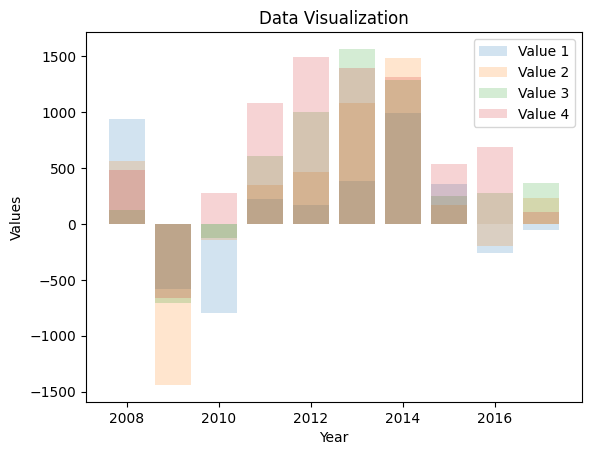

In [130]:
import matplotlib.pyplot as plt
# Extract the years and values
years = [k for k in returns.keys()]
values = [[v[i] for v in returns.values()] for i in range(4)]
colors = ['green', 'darkgreen', 'blue', 'darkblue']
# Create a bar chart
for i in range(4):
    plt.bar(years, values[i], alpha = 0.2,label='Value {}'.format(i+1))

plt.xlabel('Year')
plt.ylabel('Values')
plt.title('Data Visualization')
plt.legend()
plt.show()


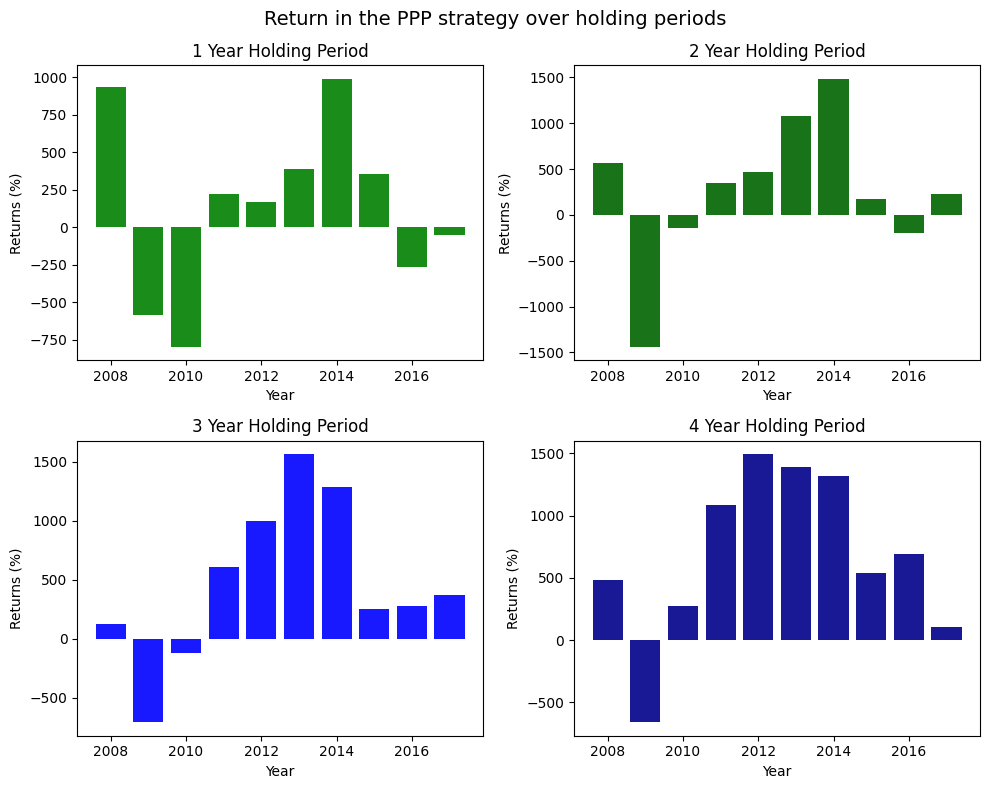

In [131]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Flatten the axs array to access individual subplots
axs = axs.flatten()


# Loop through the data and create a bar chart in each subplot
for i in range(4):
    ax = axs[i]
    ax.bar(years, values[i], alpha=0.9, color = colors[i])
    ax.set_xlabel('Year')
    ax.set_ylabel('Returns (%)')
    ax.set_title(f'{i+1} Year Holding Period')

# Add a title for the entire figure
fig.suptitle('Return in the PPP strategy over holding periods', fontsize=14)

# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

In [134]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Read country boundaries data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filter countries based on country names
countries = ['United States', 'Canada', 'Mexico']
filtered_world = world[world['name'].isin(countries)]

# Plot the countries on a map
filtered_world.plot()
plt.show()

Note: you may need to restart the kernel to use updated packages.


& was unexpected at this time.


ModuleNotFoundError: No module named 'geopandas'